**공학자를 위한 python** 

**scipy**

**SciPy란?**

SciPy('사이파이'라고 읽음)는 과학기술계산을 위한 Python 라이브러리이다. NumPy, Matplotlib, pandas, SymPy와 연계되어 있다(특히 NumPy와). 가능한 알고리즘과 관련 부패키지는 다음과 같다.


*   Clustering package (`scipy.cluster`)
*   Constants (`scipy.constants`)
*   Discrete Fourier transforms (`scipy.fftpack`)
*   Integration and ODEs (`scipy.integrate`)
*   Interpolation (`scipy.interpolate`)
*   Input and output (`scipy.io`)
*   Linear algebra (scipy.linalg)
*   Miscellaneous routines (`scipy.misc`)
*   Multi-dimensional image processing (`scipy.ndimage`)
*   Orthogonal distance regression (`scipy.odr`)
*   Optimization and root finding (`scipy.optimize`)
*   Signal processing (`scipy.signal`)
*   Sparse matrices (`scipy.sparse`)
*   Sparse linear algebra (`scipy.sparse.linalg`)
*   Compressed Sparse Graph Routines (`scipy.sparse.csgraph`)
*   Spatial algorithms and data structures (`scipy.spatial`)
*   Special functions (`scipy.special`)
*   Statistical functions (`scipy.stats`)
*   Statistical functions for masked arrays (`scipy.stats.mstats`)
*   Low-level callback functions

**설치**

Anaconda 사용자는 별도의 인스톨없이 바로 사용할 수 있다.



**NumPy와의 관계와 설정 확인**

SciPy는 NumPy 상위에서 구동되는 라이브러리 정도로 이해해도 무방하다. SciPy는 기본적으로 NumPy의 `ndarray`를 기본 자료형으로 사용한다. 일부 패키지는 중복되지만(예, 선형대수 - `numpy.linalg` vs. `scipy.linalg`, 이산푸리에변환 - `numpy.fft` vs. `scipy.fftpack`) SciPy가 보다 풍부한 기능을 제공한다.

NumPy, SciPy 등은 수치계산을 위한 패키지이므로 성능이 중요하다. 특히 BLAS와 LAPACK 등 기본 수치라이브러리로 어떤 것을 사용했는가가 중요하다. 최근 Intel MKL을 도입하였다. `numpy.show_config()`와 `scipy.show_config()`를 통해 확인할 수 있다.

In [ ]:
import numpy

```
numpy.show_config()
mkl_info:
    libraries = ['mkl_rt']
    library_dirs = ['C:/ProgramData/Anaconda3\\Library\\lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['C:\\Program Files (x86)\\IntelSWTools\\compilers_and_libraries_2016.4.246\\windows\\mkl', ...]
blas_mkl_info:
    <위와 동일>
blas_opt_info:
    <위와 동일>
lapack_mkl_info:
    <위와 동일>
lapack_opt_info:
    <위와 동일>
>>> import scipy
>>> scipy.show_config()
openblas_lapack_info:
  NOT AVAILABLE
lapack_mkl_info:
    libraries = ['mkl_rt']
    library_dirs = ['C:/ProgramData/Anaconda3\\Library\\lib']
    define_macros = [('SCIPY_MKL_H', None), ('HAVE_CBLAS', None)]
    include_dirs = ['C:\\Program Files (x86)\\IntelSWTools\\compilers_and_libraries_2016.4.246\\windows\\mkl', ...]
lapack_opt_info:
    <위와 동일>
blas_mkl_info:
    <위와 동일>
blas_opt_info:
    <위와 동일>

```



**Timing**

과학기술계산 연산은 계산 속도가 중요한 척도이다. 어떤 작업이 수행된 시간을 측정하는 것은 CPU time과 wall time으로 보통 구분한다.

CPU time : 작업을 수행한 프로세서의 시간을 합산한 시간. `time.process_time()`에서 리턴된 값의 차이로 계산
wall time : 작업을 수행한 시간. `time.perf_counter()`이나 `time.time()`에서 리턴되는 값의 차이. `time_perf_counter()`가 보다 정확한 값을 제시
예를 들어 A라는 작업을 2개 프로세서(코어)에서 동시에 쉬지지않고 작업했는데 2초가 걸렸다면, CPU time은 4초, wall time은 2초이다. 작업을 수행하는 개별 프로세서는 중간에 쉴때가 존재하므로 단순히 (wall time) * (프로세서 수) 로 CPU time이 계산되지는 않는다.

```
import numpy as np
import scipy.linalg import linalg

A = np.random.random(size=(10000,10000))

cpuTime   = time.process_time()    # CPU time
wallTime1 = time.perf_counter()   # wall time
wallTime2 = time.time()            # wall time

linalg.norm(A)

cpuTime   = time.process_time()-cpuTime     # CPU time
wallTime1 = time.perf_counter()-wallTime1   # wall time
wallTime2 = time.time()-wallTime2           # wall time

print('cpuTime : ', cpuTime)
print('wallTime1 : ',wallTime1)
print('wallTime2 : ',wallTime2)
```



#선형대수

`np.linalg`와 `scipy.linalg`에서 선형대수를 수행할 수 있다. `scipy.linalg`가` np.linalg`와 비교할 때 일부 기능이 중복되나 보다 풍부한 기능을 제공한다.

## 행렬의 곱셈

In [13]:
import numpy as np
import scipy.linalg as linalg

A = np.array([[1,2,-1],
              [2,7,4],
              [0,4,-1]])

b = np.array([1,0,1.2])

# matrix-vector multiplication
y1 = np.matmul(A,b)
y2 = np.dot(A,b)
y3 = A.dot(b)

# matrix-matrix multiplication
B = np.array([[1,2,3,4],
              [-1,2,3,1],
              [3,-2,5,9]])

C1 = np.matmul(A,B)
C2 = np.dot(A,B)
C3 = A.dot(B)

## determinant, solve, inverse

In [14]:
# determinant
det = linalg.det(A)

# solve
x = linalg.solve(A,b)
r = A.dot(x) - b   # check 0 vector

# inverse
Ainv = linalg.inv(A)


## 놈

In [15]:
# vector norm

norm1 = linalg.norm(x,1)          # L1 norm   == sum(np.abs(x))
norm2 = linalg.norm(x)            # L2 norm   == np.sqrt(sum(x*x))
# normp = linalg.norm(x,p)          # p norm
normMax = linalg.norm(x,np.inf)   # max norm  == np.max(abs(x))


# matrix norm

## LLS(Linear Least Square)

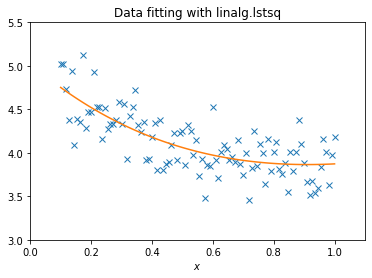

In [16]:
# least-square
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

c1, c2 = 5.0, 2.0
x = np.linspace(0.1,1,100)
y = c1*np.exp(-x) + c2*x
z = y + 0.05 * np.max(y) * np.random.randn(len(y))
A = np.vstack((np.exp(-x),x)).T

c,resid,rank,sigma = linalg.lstsq(A,z)
x2 = np.linspace(0.1,1,100)
y2 = c[0]*np.exp(-x2) + c[1]*x2

plt.plot(x,z,'x',x2,y2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x$')
plt.title('Data fitting with linalg.lstsq')
plt.show()

## 고유치 문제

```
# eigen
D,V = linalg.eigh(A)   # for real sym or complex hermitian
D,V = linalg.eig(A)

```





**기타**

*   pseudo-inverse
*   generalized inverse
*   svd
*   lu decompositon
*   cholesky
*   QR
*   schur
*   matrix functions
*   special matrix

#희소행렬

공학에서 발생하는 많은 문제들이 꽉찬 행렬(dense matrix)가 아닌 대부분 0의 값을 갖는 희소 행렬(sparse matrix)이다. 계산의 효율을 위해서 희소 행렬은 곱셈, 역행렬 등등 행렬 연산을 수행할 때 별도의 알고리즘이 적용되어야 한다.

`scipy.sparse`에서는 희소 행렬의 생성, 연산 등을 위한 함수, 객체를 제공하며, 선형대수는 `scipy.sparse.linalg`에서 제공한다.

#최적화

# 들어가기 전에

여기에서 설명할 일부함수는 scipy 1.2.1 부터 지원되는 함수가 있다. 따라서 다음과 같이 버전 확인을 하도록 한다.

In [19]:
import scipy
scipy.__version__

'1.7.3'

만약 버전이 낮다면 scipy를 업그레이드 한다.

In [ ]:
!pip install scipy --upgrade

## 개요

여러 공학 문제는 최적화(optimization) 문제로 귀결된다. `scipy.optimize` 패키지는 다음과 같은 최적화 문제를 풀 수 있다.

*    Local optimization: 비구속 및 구속 조건하의 multivariate scalar function의 최소화 문제, 'minimize'
*    Global optimizaiton : `bashinhopping`, `differential_evolution`
*    Least-squares minimization과 curve fitting : `least_squares`, `curve_fit`
*    Scalar univariate function의 최소화 또는 해 찾기 : `minimizer_scalar`, `root_scalar`
*    Multivariate equation system의 해 찾기 : `root`
*    Linear Programming : `linprog`


## 스칼라함수의 해 찾기

Univariate scalar function f(x)=0 (x는 스칼라, 함수값도 스칼라)의 해를 찾는 문제는 `scipy.optimize.root_scalar(...)`를 이용한다.
```
`optimize.root_scalar(f, args=(), method=None, bracket=None, fprime=None, fprime2=None, x0=None, x1=None, xtol=None, rtol=None, maxiter=None, options=None)

```
해가 존재하는 범위를 아는 경우(bracketing method)와 그렇지 않은 경우(non-bracketing method)로 구분할 수 있다. Bracketing method는 Brent's method를 non-bracketing method로는 newton method를 사용하면 된다. Brent's method를 사용할 때는 해를 찾아야 하는 범위를 bracket 인자로 주어야 하며 해가 존재하는 경우 항상 해를 찾을 수 있다.

In [21]:
from scipy import optimize

def func(x):
    return x**3-1

sol = optimize.root_scalar(func, bracket=[0, 3], method='brentq')

if sol.converged == True:
    print('Solution = ', sol)  

Solution =        converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 1.0


Newton method는 초기값을 x0 인자로 fprime 인자로는 미분함수를 제공해야 한다. fprime의 보조인자는 f 인자에 사용된 함수의 보조인자와 동일해야 한다.

In [22]:
from scipy import optimize

def func(x):
    return x**3-1

def derivative(x):
    return 3*x**2

sol = optimize.root_scalar(func,x0=1.5,method='newton',fprime=derivative)
if sol.converged == True:
    print('Solution = ', sol)

Solution =        converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: 1.0


##Inner function으로 최적화 대상 함수를 정의하기

*    최적화 루틴은 대부분 사용자가 함수를 작성하여 최적화 루틴에 인자로 제공해야 한다. 보통은 이 함수는 다양한 정보를 가지고 있어야 한다. 따라서 그 정보를 인자로 넘겨 주어야 하므로, 인터페이스가 복잡할 여지가 있다. 따라서 경우에 따라서 inner function으로 대상 함수를 작성하는 것이 간결할 수 있다.

*    클래스 멤버함수는 첫번째 인자가 self이다. 따라서 클래스의 어떤 멤버 함수내에서 최적화를 수행하고자할 때는 정적 멤버함수를 다시 정의해 주어야 한다. 다른 방법은 inner function을 사용하는 것이다.

## Local optimization

최적화 문제는 다음과 같은 형태이다.
$$min~f(x)~subject~to~g_i(x)\ge0,i=1,...,m$$
$$h_j(x)=0,j=1,...,p$$
<br>

$$f(x)$$
 는 최소화의 대상이 되는 스칼라 함수로 목적함수라고 불린다. $$x$$는 벡터이다. 
$$g_i(x)$$
나 $$h_j(x)$$는 구속조건이다. 구속조건이 없는 경우는 비구속 최적화(unconstrained optimization), 존재하는 경우는 구속 최적화(constrained optimization) 문제라고 한다.

scipy.optimize에서는 다양한 최적화 알고리즘을 제공하고 있는데 minimize(fun,x0,method=method,...) 함수로 일원화해서 풀도록 권장하고 있다. 이 함수은 OptimizeResult라는 객체에 결과를 담아 리턴한다.



```
scipy.optimize.minimize(fun, x0, args=(), method=None, 
                                jac=None, hess=None, hessp=None, 
                                bounds=None, constraints=(), 
                                tol=None, callback=None, options=None)`

```



*   `fun, x0` : 목적함수와 초기값(initial guess)
*   `method` : 사용할 알고리즘(솔버)를 나타내는 문자열. `Nelder-Mead, Powell, CG, BFGS, trust-ncg` 등등
*   `jac, hess, hessp` : 목적함수의 자코비언, 헤시안, 헤시안과 임의 벡터의 곱. 사용하는 알고리즘에 따라 필요할 수도, 필요하지 않을 수도 있음
*   `bounds, constraints` : 구속최적화 문제에서의 구속조건을 부과하는 데 사용
*   `tol`:: 반복계산시 사용되는 종료를 위한 허용치(tolerance for termination)
*   `options` : dict형태로 주어지는 알고리즘별 옵션.` maxiter`와 `disp`는 공통이고 `show_options(solver='minimize',method-'nelder-mead')`등과 같이 알고리즘별 옵션 조회 가능
*   `maxiter` : 정수로 최대 반복회수
*   `disp` : 수렴 정보를 출력할 지 여부(True 또는 False)




최적화 알고리즘에 따라 비구속, 구속조건에 적용할 수 있는 범주가 다르며, 경우에 따라서 자코비안, 헤시안 등이 필요할 수 있다. 다음은 그 특징을 정리한 것이다.

## 비구속 최적화(unconstrained minimization)

스크린샷 2022-11-22 오전 11.46.35.png

## 비구속 최적화

예를 들어 `BFGS

In [23]:
import numpy as np
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

def rosen_hess(x):
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H


def rosen_hess_p(x, p):
    x = np.asarray(x)
    Hp = np.zeros_like(x)
    Hp[0] = (1200*x[0]**2 - 400*x[1] + 2)*p[0] - 400*x[0]*p[1]
    Hp[1:-1] = -400*x[:-2]*p[:-2]+(202+1200*x[1:-1]**2-400*x[2:])*p[1:-1] \
               -400*x[1:-1]*p[2:]
    Hp[-1] = -400*x[-2]*p[-2] + 200*p[-1]
    return Hp

x0 = np.array([1.3,0.7,0.8,1.9,1.2])
#x0 = np.zeros([-1,2,3,1,5])


res = minimize(rosen,x0,method='nelder-mead',
               options={'xtol':1e-8,'disp':True})
print('nelder-mead:',res.x)

res = minimize(rosen, x0, method='BFGS', jac=rosen_der,
               options={'disp': True})
print('BFGS:',res.x)

res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})
print('Newton-CG with Hessian:',res.x)


res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hessp=rosen_hess_p,
               options={'xtol': 1e-8, 'disp': True})
print('Newton-CG with Hessian product:',res.x)


res = minimize(rosen, x0, method='trust-ncg',
               jac=rosen_der, hess=rosen_hess,
               options={'gtol': 1e-8, 'disp': True})
print('trust-ncg with Hessian:',res.x)

res = minimize(rosen, x0, method='trust-ncg',
               jac=rosen_der, hessp=rosen_hess_p,
               options={'gtol': 1e-8, 'disp': True})
print('trust-ncg with Hessian product:',res.x)



res = minimize(rosen, x0, method='trust-krylov',
               jac=rosen_der, hess=rosen_hess,
               options={'gtol': 1e-8, 'disp': True})


res = minimize(rosen, x0, method='trust-krylov',
               jac=rosen_der, hessp=rosen_hess_p,
               options={'gtol': 1e-8, 'disp': True})


import scipy.optimize as optimize 

optimize.show_options(solver='minimize',method='nelder-mead')


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
nelder-mead: [1. 1. 1. 1. 1.]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30
BFGS: [1.00000004 1.0000001  1.00000021 1.00000044 1.00000092]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 33
         Hessian evaluations: 24
Newton-CG with Hessian: [1.         1.         1.         0.99999999 0.99999999]
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 33
         Hessian evaluations: 66
Newton-CG with Hessian product: [1.         1.         1.         0.99999999 0.99999999]
Optimization te

#이산 푸리에변환

NumPy에서는 `numpy.fft`에서 Matlab과 거의 동일한 형식으로 DFT를 지원한다. 주로 사용하는 함수는 `fft(x), ifft(x), fftfreq(n), fftshift(x)` 등이다. 또한 matplotlib의 `stem(x)`를 `stem plot`을 그리는 데 많이 사용한다.

FFT의 정의는 Matlab과 동일하다. 다만 인덱스가 0부터라는 점에 주의해야 한다.

##FFT의 정의와 실수 신호

### FFT의 정의

다음은 
$$x_m↔X_n$$
이고 데이터 개수가 N일 때 FFT와 IFFT의 정의이다.

*   FFT
$$X_n=\sum_{m=0}^{N-1} x_m exp(-j \frac{2πmn}{N},where~n=0,1,...,N-1 )$$
*   Inverse FFT
$$X_n= \frac{1}{N} \sum_{m=0}^{N-1} x_m exp(j \frac{2πmn}{N},where~n=0,1,...,N-1 )$$

### 실수 신호의 FFT
실수 신호의 FFT는 항상 신호의 1/2 점을 기준으로 공액 관계를 이룬다.

스크린샷 2022-11-22 오후 12.06.38.png

In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.ion()

x = np.array([1.0,0.8,0.1,0.2,0.5,0.1,0,0.2]) # even number
# x = np.array([1.0,0.8,0.1,0.2,0.5,0.1,0.2]) # odd number

xf = np.fft.fft(x)

plt.subplot(3,1,1)
plt.stem(x); plt.ylabel('x')
plt.title('Even number real signal')
# plt.title('Odd number real signal')

plt.subplot(3,1,2)
plt.stem(np.abs(xf)); plt.ylabel('abs(X)')

plt.subplot(3,1,3)
plt.stem(np.angle(xf)); plt.ylabel('angle(X)')

plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot.

스크린샷 2022-11-22 오후 12.08.19.png

##Fourier transform 근사와 신호분석

### Fourier transform의 정의와 DFT 근사
Fourier transform은 학자에 따라 다양하게 정의된다. 
$$x(t)↔X(ω)$$ 쌍에 대해 보통 사용하는 정의는 다음과 같다.

*  Forward Fourier Transform
$$x(t)= \frac{1}{2\pi} \int_ {-\infty} ^ {\infty} X( \omega )exp(-jωt)dt  $$
*   Inverse Fourier Transform
$$ X(w)= \frac{1}{2\pi} \int_ {-\infty} ^ {\infty} X( \omega )exp(-jωt)dt  $$

위 정의를 사용할 때 DFT를 이용해 근사적으로 계산하는 것은 다음과 같다.

*   Forward Fourier Transform : `X = fft(x)*dt`
*   Inverse Fourier Transform : `x = ifft(X)/dt`

여기에서 dt는 샘플링 시간간격등이다.



# DFT를 이용한 신호분석
다음은 60 Hz 와 120 Hz의 사인 곡선이 중첩된 신호

$$x(t)=0.7sin(120πt)+sin(240πt)$$

에 
$$N(μ=0,σ=2)$$
를 따르는 노이즈가 포함된 신호에 대해 주파수 분석을 한 예이다.

샘플링 주파수는 100 Hz이고 1500개의 데이터가 있다고 가정하기로 한다.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
fs = 100 
fmax = 1000      # sampling frequency 1000 Hz
dt = 1/fs      # sampling period
N  = 1500      # length of signal

t  = np.arange(0,N)*dt   # time = [0, dt, ..., (N-1)*dt]

s = 0.7*np.sin(2*np.pi*60*t) + np.sin(2*np.pi*120*t)

x = s+2*np.random.randn(N)   # random number Normal distn, N(0,2)... N(0,2*2)

plt.subplot(2,1,1)
plt.plot(t[0:51],s[0:51],label='s')
plt.plot(t[0:51],x[0:51],label='x')
plt.legend()
plt.xlabel('time'); plt.ylabel('x(t)'); plt.grid()

# Fourier spectrum

df = fmax/N   # df = 1/N = fmax/N
f = np.arange(0,N)*df     #   frq = [0, df, ..., (N-1)*df]

xf = np.fft.fft(x)*dt

plt.subplot(2,1,2)
plt.plot(f[0:int(N/2+1)],np.abs(xf[0:int(N/2+1)]))
plt.xlabel('frequency(Hz)'); plt.ylabel('abs(xf)'); plt.grid()
plt.tight_layout()

주파수 분석결과 60 Hz 및 120 Hz에서 피크를 보임을 알 수 있다.

##주파수 해석 예

선형계의 경우 동적해석은 주파수 영역에서 해석이 가능하다. 다음은 스프링, 댐퍼, 질량으로 구성된 단자유도계에 대한 주파수 해석 코드이다.

*   질량 1, 고유주기 2 sec, 감쇠비 0.1 인 시스템에 대해
*   Half-sine 함수가 외부하중으로 주어질 경우
*   1024개의 데이터, 총 시간 40 sec

에 대한 해석을 수행한 것이다.

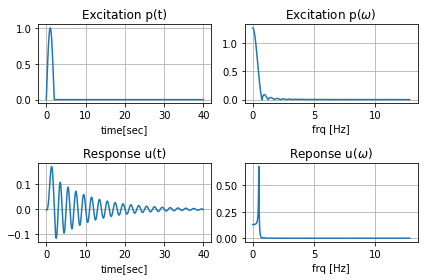

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Signal properties
N=1024; T=40; dt =T/N
t = np.arange(0,N*dt,dt)   # [0,dt, ..., (N-1)*dt]

# System properties
Tn = 2.;
xi = 0.1;

wn = 2*np.pi/Tn

m = 1
c = 2*m*wn*xi
k = wn*wn

# Excitation force
p0 = 1; td = 2;
p = np.zeros(N)
p[t<td] = np.sin(np.pi*t[t<td]/td)

# Frequency response
df = 1/T
f = np.arange(0,N*df,df)   #[0,df,...,(N-1)*df]
w = 2*np.pi*f

pf = np.fft.fft(p)*dt
H = 1/(-w*w*m+c*m*1j+k)


uf = pf*H
for i in range(0,int(N/2)):
    uf[N-i-1] = np.conjugate(uf[i+1])

ut = np.real(np.fft.ifft(uf)/dt)    


plt.subplot(2,2,1)
plt.plot(t,p)
plt.title('Excitation p(t)'); plt.xlabel('time[sec]')
plt.grid()

plt.subplot(2,2,2)
plt.plot(f[0:int(N/2+1)],abs(pf[0:int(N/2+1)]))
plt.title(r'Excitation p($\omega$)'); plt.xlabel('frq [Hz]')
plt.grid()


plt.subplot(2,2,3)
plt.plot(t,ut)
plt.title('Response u(t)'); plt.xlabel('time[sec]')
plt.grid()

plt.subplot(2,2,4)
plt.plot(f[0:int(N/2+1)],np.abs(uf[0:int(N/2+1)]))
plt.title(r'Reponse u($\omega$)'); plt.xlabel('frq [Hz]')
plt.grid()


plt.tight_layout()
